In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import load_dataset
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_curve, auc

## Preprocessing and EDA

### a. Read dataset

In [3]:
path='C:/Users/user/Desktop/EPHI-Challenge/data/CHAMPS.csv'
df=load_dataset.load_data(path)

In [4]:
df.head()

,packet_version_id,id_ver_nmb,champs_id,dp_001,dp_002,dp_003,dp_004,dp_005,dp_006,dp_007,...,dpf_012___ch00040,dpf_012___ch00041,dpf_012___ch00042,dpf_012___ch00043,dpf_012___ch01424,dpf_012___ch01875,dpf_012___ch00010,dpf_013,dpf_014,crf_060302_decode_panel_feedback_form_complete
0,ETAA00002_01_01,2.0.0,ETAA00002,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,Tseyon Tesfaye Clinical,NaN,2
1,ETAA00004_01_02,2.0.0,ETAA00004,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
2,ETAA00005_01_02,2.0.0,ETAA00005,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
3,ETAA00008_01_04,2.0.0,ETAA00008,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Abdurahman Yonis(HO), Eyoel Taye(counselor), G...",The family leaves in a refugee camp and even t...,2
4,ETAA00009_01_01,2.0.0,ETAA00009,5,18,19,20,21.0,7.0,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Columns: 381 entries, packet_version_id to crf_060302_decode_panel_feedback_form_complete
dtypes: float64(106), int64(135), object(140)
memory usage: 1.3+ MB


### b. Number of columns and rows in dataset

In [6]:
df.shape

(444, 381)

### c. Enumerate the columns of the dataset

In [7]:
for index, column in enumerate(df.columns):
    print(f"{index}: {column}")

0: packet_version_id
1: id_ver_nmb
2: champs_id
3: dp_001
4: dp_002
5: dp_003
6: dp_004
7: dp_005
8: dp_006
9: dp_007
10: dp_008
11: dp_009
12: dp_010
13: dp_011
14: dp_012
15: dp_013
16: dp_153
17: dp_016
18: dp_017
19: dp_154
20: dp_155
21: dp_014
22: dp_108
23: dp_109
24: dp_110
25: dp_111
26: dp_112
27: dp_113
28: dp_114
29: dp_115
30: dp_116
31: dp_117
32: dp_157
33: dp_018
34: dp_019
35: dp_020
36: dp_021
37: dp_022
38: dp_023
39: dp_024
40: dp_025
41: dp_026
42: dp_027
43: dp_156
44: dp_028
45: dp_029
46: dp_030
47: dp_031
48: dp_032
49: dp_033
50: dp_034
51: dp_035
52: dp_036
53: dp_037
54: dp_038
55: dp_039
56: dp_040
57: dp_041
58: dp_042
59: dp_043
60: dp_044
61: dp_045
62: dp_046
63: dp_047
64: dp_048
65: dp_049
66: dp_050
67: dp_051
68: dp_052
69: dp_053
70: dp_054
71: dp_055
72: dp_056
73: dp_057
74: dp_058
75: dp_059
76: dp_060
77: dp_061
78: dp_062
79: dp_063
80: dp_064
81: dp_065
82: dp_066
83: dp_067
84: dp_068
85: dp_069
86: dp_070
87: dp_071
88: dp_072
89: dp_073
90

### d. Rename the columns.

In [8]:
df.rename(columns={'dp_013':'case_type'},inplace=True)

In [9]:
df['case_type']

0      CH00716
1      CH00716
2      CH00716
3      CH00719
4      CH01406
        ...   
439    CH00716
440    CH01404
441    CH00718
442    CH00719
443    CH01406
Name: case_type, Length: 444, dtype: object

### e. Rename values

In [ ]:
df['case_type'] = df['case_type'].replace({'CH00716': 'Stillbirth', 
                                           'CH01404': 'Death in the first 24 hours',
                                           'CH01405':'Early Neonate',
                                           'CH01406':'Late Neonate',
                                           'CH00718':'Infant',
                                           'CH00719':'Child'})

In [91]:
df['case_type']

0                       Stillbirth
1                       Stillbirth
2                       Stillbirth
3                            Child
4                     Late Neonate
                  ...             
439                     Stillbirth
440    Death in the first 24 hours
441                         Infant
442                          Child
443                   Late Neonate
Name: case_type, Length: 444, dtype: object

In [92]:
# f. Show the proportion of null values in each column.
null_percentage =(df.apply(pd.isnull).sum()/df.shape[0])*100
for column, percentage in null_percentage.items():
    print(f"{column}: {percentage:.2f}%")

packet_version_id: 0.00%
id_ver_nmb: 0.00%
champs_id: 0.00%
dp_001: 0.00%
dp_002: 0.00%
dp_003: 0.00%
dp_004: 12.84%
dp_005: 16.89%
dp_006: 16.89%
dp_007: 18.47%
dp_008: 19.14%
dp_009: 26.35%
dp_010: 36.71%
dp_011: 56.08%
dp_012: 0.00%
case_type: 0.00%
dp_153: 46.17%
dp_016: 0.00%
dp_017: 93.69%
dp_154: 97.30%
dp_155: 6.31%
dp_014: 99.32%
dp_108: 0.00%
dp_109: 7.43%
dp_110: 93.02%
dp_111: 99.77%
dp_112: 98.20%
dp_113: 100.00%
dp_114: 98.87%
dp_115: 99.77%
dp_116: 94.59%
dp_117: 94.59%
dp_157: 20.05%
dp_018: 63.06%
dp_019: 63.51%
dp_020: 80.63%
dp_021: 99.55%
dp_022: 91.44%
dp_023: 99.55%
dp_024: 95.95%
dp_025: 100.00%
dp_026: 95.72%
dp_027: 95.72%
dp_156: 68.47%
dp_028: 79.50%
dp_029: 81.31%
dp_030: 87.61%
dp_031: 100.00%
dp_032: 95.27%
dp_033: 99.77%
dp_034: 98.65%
dp_035: 100.00%
dp_036: 97.75%
dp_037: 97.75%
dp_038: 87.84%
dp_039: 88.51%
dp_040: 93.92%
dp_041: 100.00%
dp_042: 97.30%
dp_043: 100.00%
dp_044: 99.32%
dp_045: 100.00%
dp_046: 98.65%
dp_047: 98.65%
dp_048: 93.69%
dp_049: 9

## Descriptive Data analysis

### a. The magnitude and proportion of each of the infant underlying cause for child death?

In [93]:
# Calculate magnitude
magnitude = df['dp_108'].value_counts()

# Calculate proportion
proportion = (magnitude / len(df)) * 100

In [94]:
magnitude

dp_108
Intrauterine hypoxia                                148
Birth asphyxia                                       33
Undetermined                                         28
Severe acute malnutrition                            24
Craniorachischisis                                   16
                                                   ... 
Severe acute malnutrition-Kwashiorkor                 1
severe acute malnutrition, Marasmic Kwashiorkor       1
Severe acute malnutrition - Marasmic kwashiorkor      1
Congenital CMV infection                              1
Bacterial sepsis of the newborn                       1
Name: count, Length: 97, dtype: int64

In [95]:
proportion

dp_108
Intrauterine hypoxia                                33.333333
Birth asphyxia                                       7.432432
Undetermined                                         6.306306
Severe acute malnutrition                            5.405405
Craniorachischisis                                   3.603604
                                                      ...    
Severe acute malnutrition-Kwashiorkor                0.225225
severe acute malnutrition, Marasmic Kwashiorkor      0.225225
Severe acute malnutrition - Marasmic kwashiorkor     0.225225
Congenital CMV infection                             0.225225
Bacterial sepsis of the newborn                      0.225225
Name: count, Length: 97, dtype: float64

### b. The proportion and magnitude of the maternal factors contributing for child death?

In [96]:
# Calculate magnitude
magnitude = df['dp_118'].value_counts()

# Calculate proportion
proportion = (magnitude / len(df)) * 100

In [97]:
magnitude

dp_118
Preeclampsia                                                                                             36
Twin pregnancy                                                                                           12
Fetus and newborn affected by other forms of placental separation and hemorrhage (Abruption placenta)    11
Eclampsia                                                                                                 9
Fetus and newborn affected by other forms of placental separation and hemorrhage                          5
                                                                                                         ..
Fetus and newborn affected by oligohydramnios                                                             1
Fetus and newborn affected by maternal diabetes                                                           1
Fetus and newborn affected by maternal infectious and parasitic diseases (HIV)                            1
Fetus and newborn aff

In [98]:
proportion

dp_118
Preeclampsia                                                                                             8.108108
Twin pregnancy                                                                                           2.702703
Fetus and newborn affected by other forms of placental separation and hemorrhage (Abruption placenta)    2.477477
Eclampsia                                                                                                2.027027
Fetus and newborn affected by other forms of placental separation and hemorrhage                         1.126126
                                                                                                           ...   
Fetus and newborn affected by oligohydramnios                                                            0.225225
Fetus and newborn affected by maternal diabetes                                                          0.225225
Fetus and newborn affected by maternal infectious and parasitic diseases (HIV)   

### c. The proportion of the child death by the case type

In [99]:
# Calculate magnitude
magnitude = df['case_type'].value_counts()

# Calculate proportion
proportion = (magnitude / len(df)) * 100

In [100]:
proportion

case_type
Stillbirth                     53.828829
Death in the first 24 hours    15.540541
Early Neonate                  11.036036
Child                           9.459459
Infant                          6.081081
Late Neonate                    4.054054
Name: count, dtype: float64

## Correlation

In [101]:
df2=df[['champs_id','dp_108','dp_118','case_type']]

In [102]:
df2

,champs_id,dp_108,dp_118,case_type
0,ETAA00002,Undetermined,Undetermined,Stillbirth
1,ETAA00004,Undetermined,Undetermined,Stillbirth
2,ETAA00005,Intrauterine hypoxia,Fetus and newborn affected by other forms of p...,Stillbirth
3,ETAA00008,Severe acute malnutrition - Kwashiorkor,NaN,Child
4,ETAA00009,Sepsis,NaN,Late Neonate
...,...,...,...,...
439,ETAA01598,Intrauterine hypoxia,Fetus affected by cord prolapse,Stillbirth
440,ETAA01600,Sepsis,Pre-labor rapture of membrane,Death in the first 24 hours
441,ETAA01764,Pneumonia,NaN,Infant
442,ETAA01768,Pneumonia,NaN,Child


In [103]:
# Filter the DataFrame for 'Child' cases
child_cases = df2[df2['case_type'] == 'Child']

# Count occurrences of each unique maternal factor (dp_118), excluding empty values
maternal_factors_counts = child_cases['dp_118'].value_counts()

# Calculate proportions
total_child_cases = len(child_cases)
maternal_factors_proportions = maternal_factors_counts / total_child_cases


In [104]:
child_cases.head()

,champs_id,dp_108,dp_118,case_type
3,ETAA00008,Severe acute malnutrition - Kwashiorkor,NaN,Child
5,ETAA00011,Pneumonia. unspecified,NaN,Child
13,ETAA00031,Severe acute malnutrition,NaN,Child
19,ETAA00044,Sepsis,NaN,Child
42,ETAA00087,Measles,NaN,Child


In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
df3=df2[['dp_108','dp_118','case_type']]
df3.head()

,dp_108,dp_118,case_type
0,Undetermined,Undetermined,Stillbirth
1,Undetermined,Undetermined,Stillbirth
2,Intrauterine hypoxia,Fetus and newborn affected by other forms of p...,Stillbirth
3,Severe acute malnutrition - Kwashiorkor,NaN,Child
4,Sepsis,NaN,Late Neonate


C:\Users\user\AppData\Local\Temp\ipykernel_8032\3475467699.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["dp_108_encoded"] = label_encoder.fit_transform(filtered_data["dp_108"])
C:\Users\user\AppData\Local\Temp\ipykernel_8032\3475467699.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["dp_118_encoded"] = label_encoder.fit_transform(filtered_data["dp_118"])
C:\Users\user\AppData\Local\Temp\ipykernel_8032\3475467699.py:9: SettingWithCopyWarning: 
A value is trying to be se

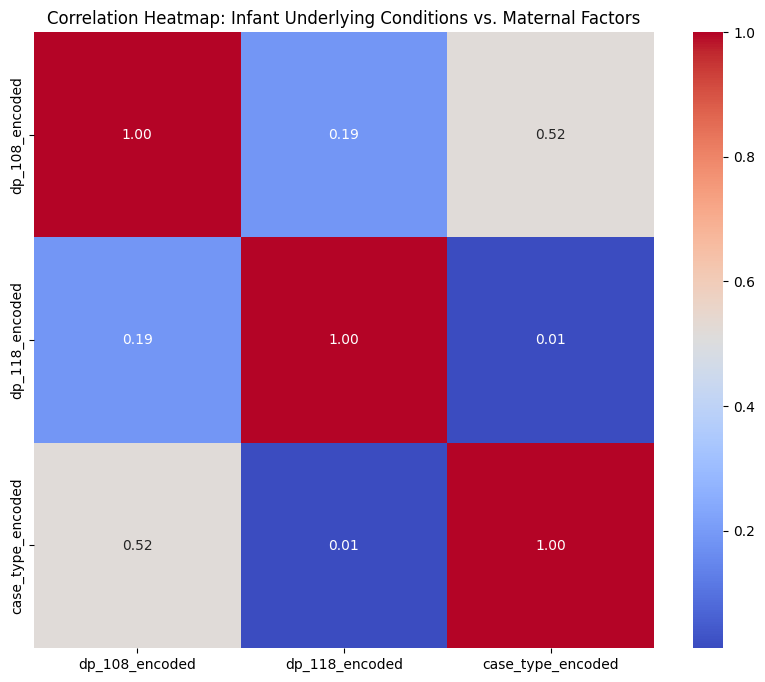

In [107]:
# Filter the data for top three causes of child death
top_causes = ["Intrauterine hypoxia", "Birth asphyxia", "Undetermined"]  # Top three causes
filtered_data = df3[df3["dp_108"].isin(top_causes)]

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
filtered_data["dp_108_encoded"] = label_encoder.fit_transform(filtered_data["dp_108"])
filtered_data["dp_118_encoded"] = label_encoder.fit_transform(filtered_data["dp_118"])
filtered_data["case_type_encoded"] = label_encoder.fit_transform(filtered_data["case_type"])
# Create a heatmap of correlations between infant underlying conditions and maternal factors
correlation_matrix = filtered_data[['dp_108_encoded','dp_118_encoded','case_type_encoded']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Infant Underlying Conditions vs. Maternal Factors")
plt.show()

## 4. Feature Engineering

In [108]:
# Define X and y
X = filtered_data[["dp_108_encoded", "dp_118_encoded"]]
y = filtered_data["case_type_encoded"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train and evaluate each classification model
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(kernel='linear', decision_function_shape='ovr'),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

# Create a list to store accuracy values
accuracy_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accuracy_list.append({"Model": model_name, "Accuracy": accuracy})

# Display accuracy summary table
accuracy_df = pd.DataFrame(accuracy_list)
print("\nAccuracy Summary:")
print(accuracy_df.to_string(index=False))


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Accuracy Summary:
                 Model  Accuracy
   Logistic Regression  0.857143
Support Vector Machine  0.857143
              AdaBoost  0.833333
         Random Forest  0.857143
     Gradient Boosting  0.880952
               XGBoost  0.880952


In [109]:
# Rank features based on importance for each model
feature_importances = {}
for model_name, model in models.items():
    if hasattr(model, 'coef_'):
        feature_importances[model_name] = model.coef_[0]
    elif hasattr(model, 'feature_importances_'):
        feature_importances[model_name] = model.feature_importances_

# Print feature rankings
for model_name, importance_scores in feature_importances.items():
    feature_ranking = sorted(zip(X.columns, importance_scores), key=lambda x: x[1], reverse=True)
    print(f"\nFeature Ranking for {model_name}:")
    for feature, importance in feature_ranking:
        print(f"{feature}: {importance:.4f}")


Feature Ranking for Logistic Regression:
dp_108_encoded: 1.4505
dp_118_encoded: 0.0257

Feature Ranking for Support Vector Machine:
dp_108_encoded: 2.0000
dp_118_encoded: 0.0000

Feature Ranking for AdaBoost:
dp_108_encoded: 0.9600
dp_118_encoded: 0.0400

Feature Ranking for Random Forest:
dp_108_encoded: 0.6969
dp_118_encoded: 0.3031

Feature Ranking for Gradient Boosting:
dp_108_encoded: 0.7661
dp_118_encoded: 0.2339

Feature Ranking for XGBoost:
dp_108_encoded: 0.9381
dp_118_encoded: 0.0619


## 5. Model evaluation

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

Best Performing Model: Logistic Regression (Accuracy: 0.84)


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R

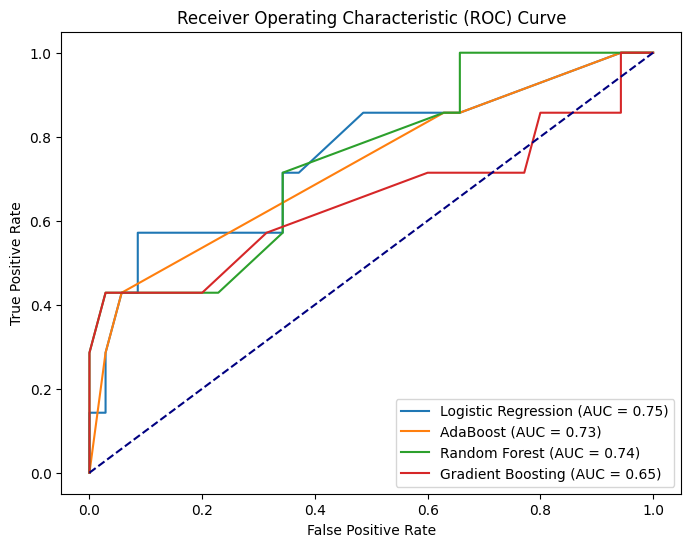

In [110]:
models = [
    ("Logistic Regression", LogisticRegression(multi_class='multinomial', solver='lbfgs')),
    ("Support Vector Machine", SVC(kernel='linear', decision_function_shape='ovr')),
    ("AdaBoost", AdaBoostClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier())
]

# Evaluate models using n-fold cross-validation and select the best performing model
best_model = None
best_accuracy = 0.0

for model_name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    accuracy = scores.mean()
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print(f"Best Performing Model: {best_model} (Accuracy: {best_accuracy:.2f})")

# Plot ROC curve for each model
plt.figure(figsize=(8, 6))

for model_name, model in models:
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba method
        y_score = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)  # Adjust pos_label as needed
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 6. Result Visualization

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


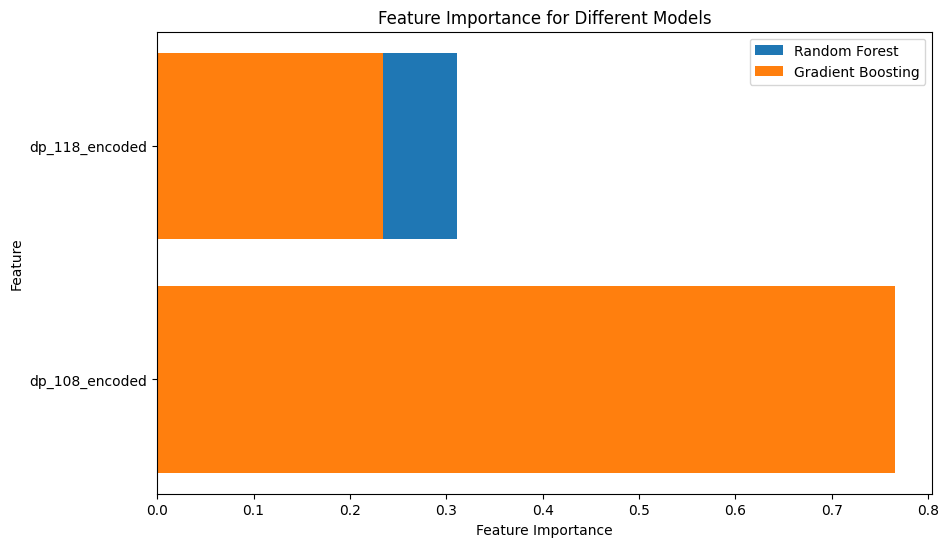

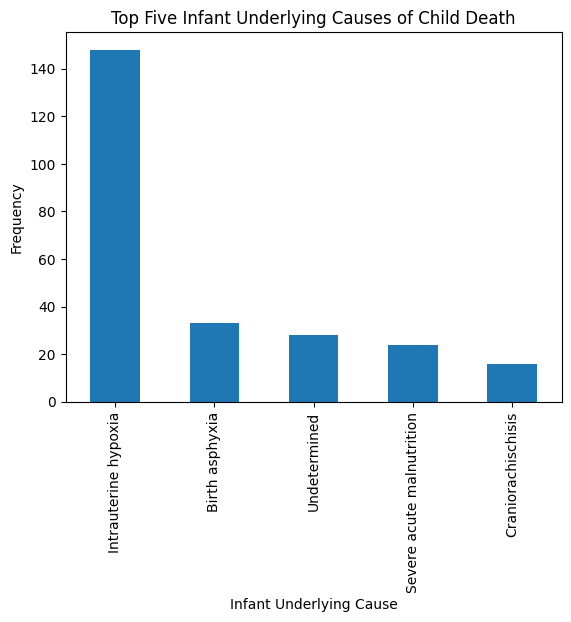

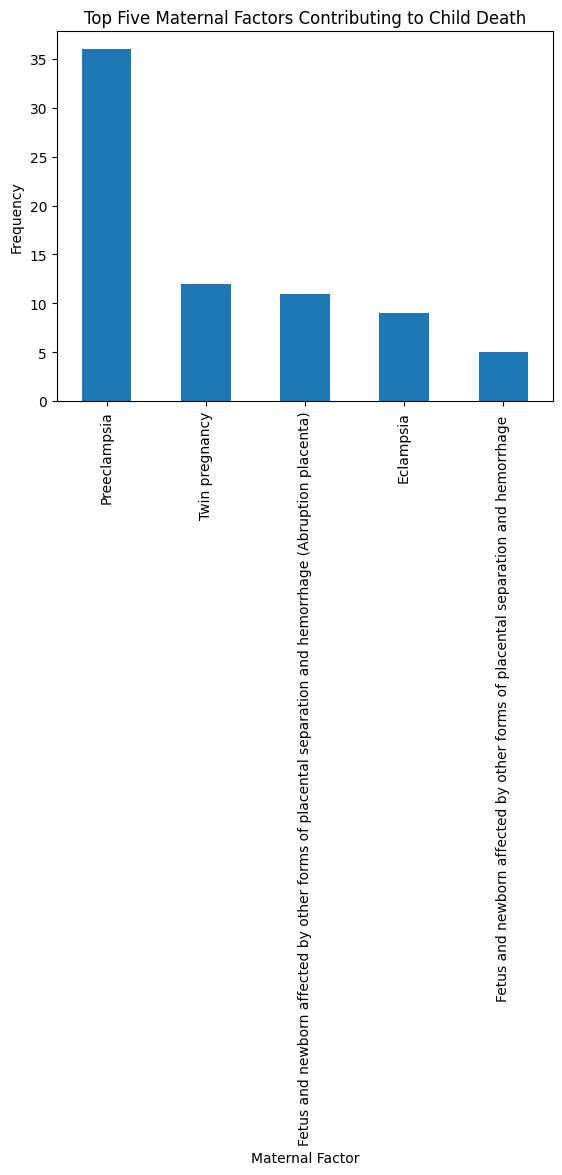

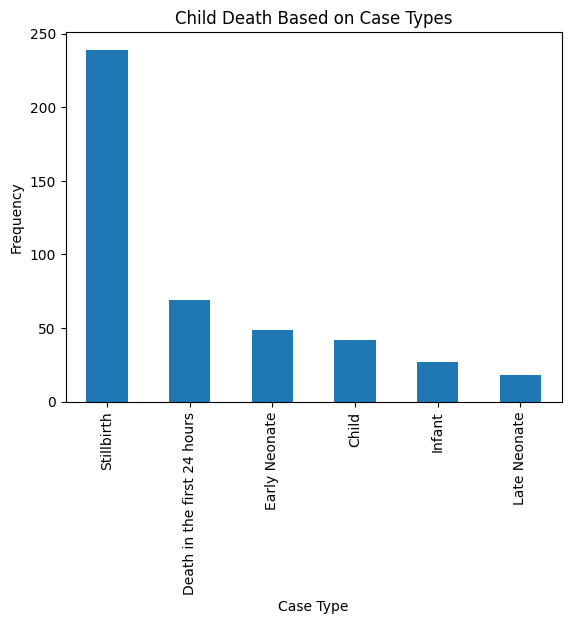

In [111]:
models = [
    ("Logistic Regression", LogisticRegression(multi_class='multinomial', solver='lbfgs')),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier())
]

# Train each model and get feature importances
feature_importances = {}

for model_name, model in models:
    model.fit(X_train, y_train)
    if hasattr(model, "feature_importances_"):  # Check if the model has feature_importances_ attribute
        feature_importances[model_name] = model.feature_importances_

# Plot feature importance for each model
plt.figure(figsize=(10, 6))

for model_name, importance in feature_importances.items():
    sorted_indices = importance.argsort()[::-1]
    sorted_features = X.columns[sorted_indices]
    plt.barh(sorted_features, importance[sorted_indices], label=model_name)

plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Different Models')
plt.legend()
plt.show()

# Plot the top five infant underlying causes of child death
top_infant_underlying_causes = df['dp_108'].value_counts().nlargest(5)
top_infant_underlying_causes.plot(kind='bar')
plt.xlabel('Infant Underlying Cause')
plt.ylabel('Frequency')
plt.title('Top Five Infant Underlying Causes of Child Death')
plt.show()

# Plot the top five maternal factors contributing to child death
top_maternal_factors = df['dp_118'].value_counts().nlargest(5)
top_maternal_factors.plot(kind='bar')
plt.xlabel('Maternal Factor')
plt.ylabel('Frequency')
plt.title('Top Five Maternal Factors Contributing to Child Death')
plt.show()

# Plot child death based on case types
case_type_counts = df['case_type'].value_counts()
case_type_counts.plot(kind='bar')
plt.xlabel('Case Type')
plt.ylabel('Frequency')
plt.title('Child Death Based on Case Types')
plt.show()